In [94]:
#Importing the necessary libraries

import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [95]:
#Global Settings 
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [96]:
#Importing Configs
# Define the path where config.py is located
#Mac
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
#Linux
#os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
finbert_models = config.finbert_models
Body = config.Body
database = config.Local_Database

/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [97]:
#Import Sentiment Data 
state = pd.read_csv(f"{finbert_models}/{Body}/Statements/{Body}_Statements_finbert_model_short.csv")
#state = state[['date','sentiment', 'positive', 'negative', 'neutral']]
state = state[['date','sentiment']]
state = state.groupby('date').mean().reset_index()

#Positive Sentiment
#state = state[(state['sentiment'] > 0)]

#Negative Sentiment
#state = state[(state['sentiment'] < 0)]

#Neutral Sentiment
#state = state[(state['sentiment'] == 0)]

state['event'] = 1

mins = pd.read_csv(f"{finbert_models}/{Body}/Minutes/{Body}_Minutes_finbert_model_short.csv")
mins = mins[['date','sentiment', 'positive', 'negative', 'neutral']]
mins = mins.groupby('date').mean().reset_index()
mins['mins'] = 1

state['date'] = pd.to_datetime(state['date'])
mins['date'] = pd.to_datetime(mins['date'])

print(f"State: {state.date.min()} - {state.date.max()}")

State: 2000-02-02 00:00:00 - 2023-05-03 00:00:00


In [98]:
#Create a dataframe with a column date that ranges from 1990-01-01 to 2024-01-01 with a daily frequency
#This is used to merge the dataframes
date_rng = pd.date_range(start='1/1/1990', end='1/1/2024', freq='D')
date_rng = pd.DataFrame(date_rng, columns=['date'])
date_rng['temp'] = 1
state = pd.merge(date_rng, state, on='date', how='outer')
state = state[['date', 'sentiment', 'event']]

In [99]:
#Importing Market Data
sp500 = pd.read_csv(f'{database}/Market Data/SP500/SP500.csv')
sp500 = sp500[['date', 'price', 'volume']]
sp500['volume'] = sp500['volume']/1000000
sp500 = sp500.rename(columns={'price':'sp500_price', 'volume':'sp500_volume'})

emini = pd.read_csv(f'{database}/Market Data/E Mini/E Mini SP500.csv')
emini = emini[['date', 'price']]
emini = emini.rename(columns={'price':'emini_price'})

eurodollar = pd.read_csv(f'{database}/Market Data/Eurodollar/Eurodollar.csv')
eurodollar = eurodollar[['date', 'price']]
eurodollar = eurodollar.rename(columns={'price':'eurodollar_price'})

fedfutures = pd.read_csv(f'{database}/Market Data/Fed Futures/FFF 30 Day.csv')
fedfutures = fedfutures[['date', 'price']]
fedfutures = fedfutures.rename(columns={'price':'fedfutures_price'})

vix = pd.read_csv(f'{database}/Market Data/VIX/VIX.csv')
vix = vix[['date', 'sentiment']]
vix = vix.rename(columns={'sentiment':'vix_sentiment'})

unemployment = pd.read_csv(f'{database}/Market Data/Unemployment/Unemployment.csv')
unemployment = unemployment[['date', 'unemployment']]

inflation = pd.read_csv(f'{database}/Market Data/Inflation/Inflation.csv')
inflation = inflation[['date', 'inflation']]

In [100]:
#conveting date to datetime

sp500['date'] = pd.to_datetime(sp500['date'])
emini['date'] = pd.to_datetime(emini['date'])
eurodollar['date'] = pd.to_datetime(eurodollar['date'])
fedfutures['date'] = pd.to_datetime(fedfutures['date'])
vix['date'] = pd.to_datetime(vix['date'])
unemployment['date'] = pd.to_datetime(unemployment['date'])
inflation['date'] = pd.to_datetime(inflation['date'])


In [101]:
#Print the first and last dates of every dataframe
print(f"State: {state.date.min()} - {state.date.max()}")
print(f"Mins: {mins.date.min()} - {mins.date.max()}")
print(f"SP500: {sp500.date.min()} - {sp500.date.max()}")
print(f"E Mini: {emini.date.min()} - {emini.date.max()}")
print(f"Eurodollar: {eurodollar.date.min()} - {eurodollar.date.max()}")
print(f"Fed Futures: {fedfutures.date.min()} - {fedfutures.date.max()}")
print(f"VIX: {vix.date.min()} - {vix.date.max()}")
print(f"Unemployment: {unemployment.date.min()} - {unemployment.date.max()}")
print(f"Inflation: {inflation.date.min()} - {inflation.date.max()}")



State: 1990-01-01 00:00:00 - 2024-01-01 00:00:00
Mins: 1998-07-02 00:00:00 - 2023-05-24 00:00:00
SP500: 1990-01-02 00:00:00 - 2024-02-01 00:00:00
E Mini: 1997-09-09 00:00:00 - 2024-02-01 00:00:00
Eurodollar: 1990-02-02 00:00:00 - 2023-06-15 00:00:00
Fed Futures: 1990-12-14 00:00:00 - 2024-02-01 00:00:00
VIX: 1990-02-02 00:00:00 - 2024-02-01 00:00:00
Unemployment: 1990-01-01 00:00:00 - 2024-01-01 00:00:00
Inflation: 1990-01-01 00:00:00 - 2023-12-01 00:00:00


In [102]:
# #caculate rolling standard deviation of the market data
# sp500['sp500_std_30'] = sp500['sp500_volume'].rolling(window=30).std()
# sp500['sp500_std_mean'] = sp500['sp500_std_30'].rolling(window=360).mean()
# print(sp500.head(-10))


In [103]:
state = pd.merge(state, sp500, on='date', how='outer')
state = pd.merge(state, emini, on='date', how='outer')
state = pd.merge(state, eurodollar, on='date', how='outer')
state = pd.merge(state, fedfutures, on='date', how='outer')
state = pd.merge(state, vix, on='date', how='outer')
state = pd.merge(state, unemployment, on='date', how='outer')
state = pd.merge(state, inflation, on='date', how='outer')

state = state[state['date'] >= '2001-01-01']
print(state.head())


           date  sentiment  event  sp500_price  sp500_volume  emini_price  \
4018 2001-01-01        NaN    NaN          NaN           NaN          NaN   
4019 2001-01-02        NaN    NaN    1283.2700     1560.0916    1299.7500   
4020 2001-01-03    -0.2500 1.0000    1347.5600     2655.1198    1359.2500   
4021 2001-01-04        NaN    NaN    1333.3400     2637.3962    1348.2500   
4022 2001-01-05        NaN    NaN    1298.3500     1817.9495    1304.5000   

      eurodollar_price  fedfutures_price  vix_sentiment  unemployment  \
4018               NaN               NaN            NaN        4.2000   
4019           94.2400           93.6350        29.9900           NaN   
4020           94.4100           93.9800        26.6000           NaN   
4021           94.6400           94.0000        26.9700           NaN   
4022           94.8000           94.0900        28.6700           NaN   

      inflation  
4018     2.8896  
4019        NaN  
4020        NaN  
4021        NaN  
4022    

In [104]:
#create correlation matrix
print(state.corr())

                    date  sentiment  event  sp500_price  sp500_volume  \
date              1.0000    -0.0715    NaN       0.8873       -0.7179   
sentiment        -0.0715     1.0000    NaN      -0.0133       -0.0544   
event                NaN        NaN    NaN          NaN           NaN   
sp500_price       0.8873    -0.0133    NaN       1.0000       -0.5274   
sp500_volume     -0.7179    -0.0544    NaN      -0.5274        1.0000   
emini_price       0.8862    -0.0136    NaN       1.0000       -0.5250   
eurodollar_price  0.2777     0.0063    NaN       0.0505       -0.4256   
fedfutures_price  0.1980     0.0253    NaN      -0.0612       -0.3822   
vix_sentiment    -0.1191    -0.3926    NaN      -0.1445        0.3670   
unemployment     -0.2009    -0.4931    NaN      -0.4173       -0.0070   
inflation         0.2859     0.2253    NaN       0.5573        0.0158   

                  emini_price  eurodollar_price  fedfutures_price  \
date                   0.8862            0.2777       

In [105]:
#Replace NaN with 0
state['event'] = state['event'].fillna(0)


In [106]:
#Sort state by date assending
state = state.sort_values(by='date')

In [107]:
#+-10 Days from the event

# #Create a column that is the number of days since the last event for up to 10 days after the event
# state['days_since_event'] = state['event'].groupby((state['event'] != state['event'].shift()).cumsum()).cumcount()
# state['days_since_event'] = state['days_since_event'] + 1
# #If state state['days_since_event'] is greater than 10, set it to nan
# state['days_since_event'] = np.where(state['days_since_event'] > 10, np.nan, state['days_since_event'])
# #If event = 1 sent days_since_event to 0
# state['days_since_event'] = np.where(state['event'] == 1, 0, state['days_since_event'])

# #Now do the same thing but for 10 days leading up to the event 
# state['days_until_event'] = state['event'][::-1].groupby((state['event'][::-1] != state['event'][::-1].shift()).cumsum()).cumcount()[::-1]
# state['days_until_event'] = state['days_until_event'] + 1
# #If state state['days_until_event'] is greater than 10, set it to nan
# state['days_until_event'] = np.where(state['days_until_event'] > 10, np.nan, state['days_until_event'])
# #If event = 1 sent days_until_event to 0
# state['days_until_event'] = np.where(state['event'] == 1, 0, state['days_until_event'])
# state['days_until_event'] = state['days_until_event'] * -1

# #create column event_count that is the combonation of days_since_event and days_until_event where it is na if both are na
# state['event_count'] = state['days_since_event'].fillna(state['days_until_event'])

In [108]:
# #30 Days After the Event

# #Create a column that is the number of days since the last event for up to 10 days after the event
# state['days_since_event'] = state['event'].groupby((state['event'] != state['event'].shift()).cumsum()).cumcount()
# state['days_since_event'] = state['days_since_event'] + 1
# #If state state['days_since_event'] is greater than 10, set it to nan
# state['days_since_event'] = np.where(state['days_since_event'] > 30, np.nan, state['days_since_event'])
# #If event = 1 sent days_since_event to 0
# state['days_since_event'] = np.where(state['event'] == 1, 0, state['days_since_event'])

# state['event_count'] = state['days_since_event']

In [109]:
#Create a column that is the number of days since the last event for up to 10 days after the event
state['days_since_event'] = state['event'].groupby((state['event'] != state['event'].shift()).cumsum()).cumcount()
state['days_since_event'] = state['days_since_event'] + 1
#If state state['days_since_event'] is greater than 10, set it to nan
state['days_since_event'] = np.where(state['days_since_event'] > 30, np.nan, state['days_since_event'])
#If event = 1 sent days_since_event to 0
state['days_since_event'] = np.where(state['event'] == 1, 0, state['days_since_event'])

#Now do the same thing but for 10 days leading up to the event 
state['days_until_event'] = state['event'][::-1].groupby((state['event'][::-1] != state['event'][::-1].shift()).cumsum()).cumcount()[::-1]
state['days_until_event'] = state['days_until_event'] + 1
#If state state['days_until_event'] is greater than 10, set it to nan
state['days_until_event'] = np.where(state['days_until_event'] > 10, np.nan, state['days_until_event'])
#If event = 1 sent days_until_event to 0
state['days_until_event'] = np.where(state['event'] == 1, 0, state['days_until_event'])
state['days_until_event'] = state['days_until_event'] * -1

#create column event_count that is the combonation of days_since_event and days_until_event where it is na if both are na
state['event_count'] = state['days_since_event'].fillna(state['days_until_event'])

In [110]:
print(state.head(-10))  


            date  sentiment  event  sp500_price  sp500_volume  emini_price  \
4018  2001-01-01        NaN 0.0000          NaN           NaN          NaN   
4019  2001-01-02        NaN 0.0000    1283.2700     1560.0916    1299.7500   
4020  2001-01-03    -0.2500 1.0000    1347.5600     2655.1198    1359.2500   
4021  2001-01-04        NaN 0.0000    1333.3400     2637.3962    1348.2500   
4022  2001-01-05        NaN 0.0000    1298.3500     1817.9495    1304.5000   
...          ...        ...    ...          ...           ...          ...   
12433 2024-01-12        NaN 0.0000    4783.8300      588.3989    4816.5000   
12442 2024-01-15        NaN 0.0000          NaN           NaN          NaN   
12432 2024-01-16        NaN 0.0000    4765.9800      709.0697    4798.5000   
12431 2024-01-17        NaN 0.0000    4739.2100      600.7073    4771.2500   
12430 2024-01-18        NaN 0.0000    4780.9400      690.1918    4811.2500   

       eurodollar_price  fedfutures_price  vix_sentiment  unemp

   event_count                date  sp500_price  sp500_volume  emini_price  \
0      -9.0000 2010-07-12 00:00:00      -0.0418        0.0649      -0.0404   
1      -8.0000 2007-02-07 00:00:00      -0.1737        0.0691      -0.1716   
2      -7.0000 2011-05-02 08:00:00      -0.0590        0.0222      -0.0574   
3      -6.0000 2004-12-15 00:00:00      -0.1722        0.3861      -0.1694   
4      -5.0000 2003-01-30 12:00:00      -0.2586        0.2060      -0.2564   

   eurodollar_price  fedfutures_price  vix_sentiment  unemployment  inflation  
0           -0.1413           -0.1111        -0.0118        0.1023    -0.0377  
1           -0.1586           -0.1347        -0.0459        0.0146    -0.0731  
2           -0.3322           -0.2489        -0.0122       -0.0848     0.0544  
3           -0.3244           -0.2993         0.0269       -0.0556     0.0606  
4            0.0880            0.0382         0.0756        0.0146    -0.0024  


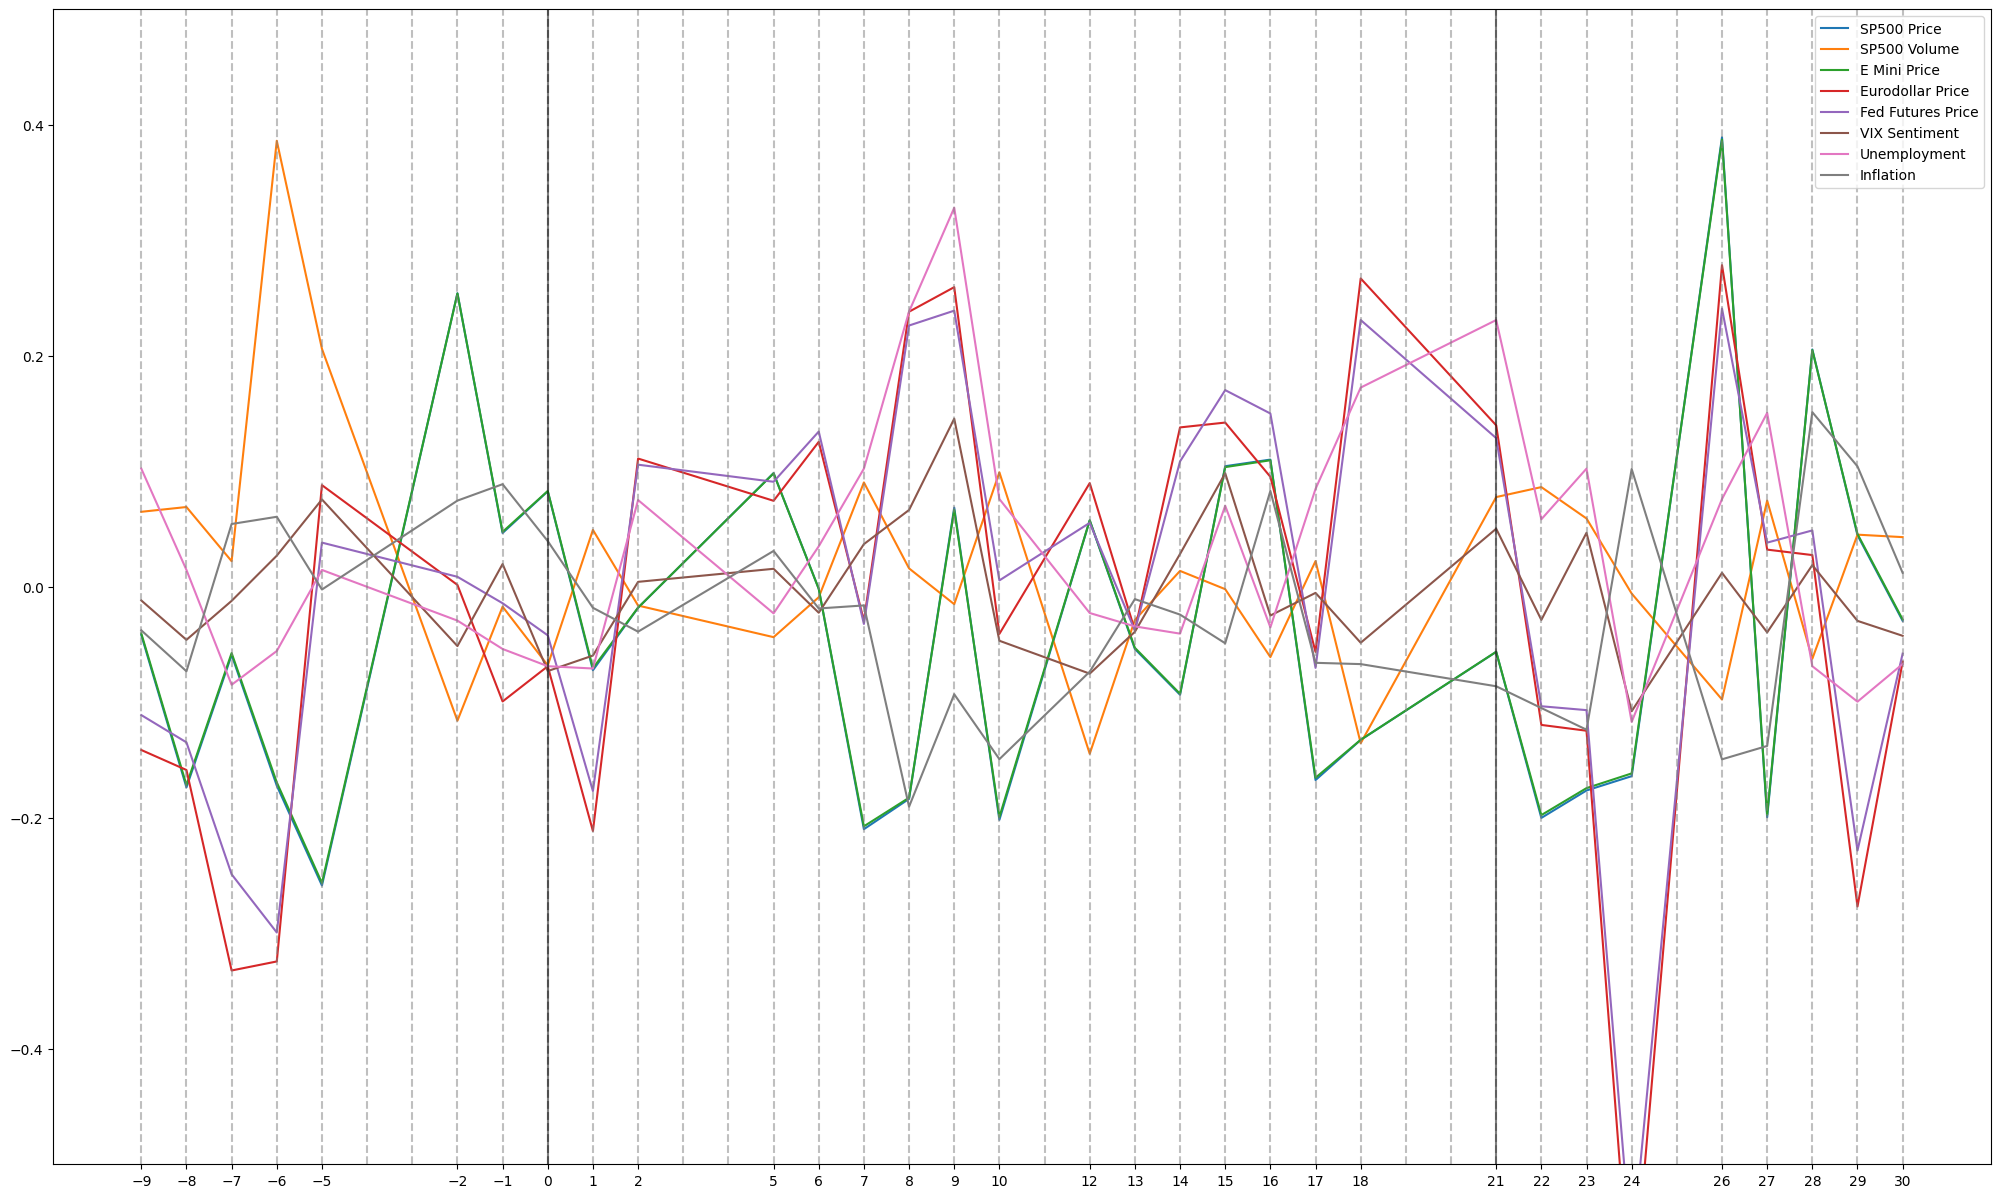

In [111]:
#create a graph of the mean of the market varaibles over the 10 days leading up to and after the event with all the variables scaled between -1 and 1
state['sp500_price'] = (state['sp500_price'] - state['sp500_price'].mean()) / (state['sp500_price'].max() - state['sp500_price'].min())
#state['sp500_std_30'] = (state['sp500_std_30'] - state['sp500_std_30'].mean()) / (state['sp500_std_30'].max() - state['sp500_std_30'].min())
#state['sp500_std_mean'] = (state['sp500_std_mean'] - state['sp500_std_mean'].mean()) / (state['sp500_std_mean'].max() - state['sp500_std_mean'].min())
state['sp500_volume'] = (state['sp500_volume'] - state['sp500_volume'].mean()) / (state['sp500_volume'].max() - state['sp500_volume'].min())
state['emini_price'] = (state['emini_price'] - state['emini_price'].mean()) / (state['emini_price'].max() - state['emini_price'].min())
state['eurodollar_price'] = (state['eurodollar_price'] - state['eurodollar_price'].mean()) / (state['eurodollar_price'].max() - state['eurodollar_price'].min())
state['fedfutures_price'] = (state['fedfutures_price'] - state['fedfutures_price'].mean()) / (state['fedfutures_price'].max() - state['fedfutures_price'].min())
state['vix_sentiment'] = (state['vix_sentiment'] - state['vix_sentiment'].mean()) / (state['vix_sentiment'].max() - state['vix_sentiment'].min())
state['unemployment'] = (state['unemployment'] - state['unemployment'].mean()) / (state['unemployment'].max() - state['unemployment'].min())
state['inflation'] = (state['inflation'] - state['inflation'].mean()) / (state['inflation'].max() - state['inflation'].min())


state = state[['date', 'sp500_price', 'sp500_volume', 'emini_price', 'eurodollar_price', 'fedfutures_price', 'vix_sentiment', 'event_count', 'unemployment', 'inflation']]
state = state.dropna()

state = state.groupby('event_count').mean().reset_index()
print(state.head())

#Plot the data
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(state['event_count'], state['sp500_price'], label='SP500 Price')
ax.plot(state['event_count'], state['sp500_volume'], label='SP500 Volume')
ax.plot(state['event_count'], state['emini_price'], label='E Mini Price')
ax.plot(state['event_count'], state['eurodollar_price'], label='Eurodollar Price')
ax.plot(state['event_count'], state['fedfutures_price'], label='Fed Futures Price')
ax.plot(state['event_count'], state['vix_sentiment'], label='VIX Sentiment')
ax.plot(state['event_count'], state['unemployment'], label='Unemployment')
ax.plot(state['event_count'], state['inflation'], label='Inflation')
ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

ax.set_xticks(state['event_count'])

#Set Y axis sale to -1 to 1
ax.set_ylim(-0.5, 0.5)

# #Add a vertical line at all days +-10 Days from the event
# for i in range(0, 11):
#     ax.axvline(x=i, color='gray', linestyle='--', alpha=0.5)
#     ax.axvline(x=i * -1, color='gray', linestyle='--', alpha=0.5)

#Add a vertical line at all days 25 Days from the event
for i in range(0, 31):
    ax.axvline(x=i, color='gray', linestyle='--', alpha=0.5)
for i in range(0, 10):
    ax.axvline(x=i * -1, color='gray', linestyle='--', alpha=0.5)
    
    
#Create a Black Vertical line at 21 days from the event
ax.axvline(x=21, color='black', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='black', linestyle='-', alpha=0.5)

ax.legend()
plt.show()



In [112]:
pivot_table = state.pivot_table(columns='event_count', values=['sentiment', 'sp500_price', 'sp500_volume', 'emini_price', 'eurodollar_price', 'fedfutures_price', 'vix_sentiment', 'unemployment', 'inflation'], aggfunc='mean')
print(pivot_table)


KeyError: 'sentiment'

In [ ]:
#graph the sentiment and market data
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax3 = ax.twinx()
ax4 = ax.twinx()
ax5 = ax.twinx()
ax6 = ax.twinx()
ax7 = ax.twinx()

#ax.plot(pivot_table['sentiment'], label='Sentiment', color='black')
ax2.plot(pivot_table['sp500_price'], label='SP500 Price', color='blue')
ax3.plot(pivot_table['sp500_volume'], label='SP500 Volume', color='green')
ax4.plot(pivot_table['emini_price'], label='E Mini Price', color='red')
ax5.plot(pivot_table['eurodollar_price'], label='Eurodollar Price', color='purple')
ax6.plot(pivot_table['fedfutures_price'], label='Fed Futures Price', color='orange')
ax7.plot(pivot_table['vix_sentiment'], label='VIX Sentiment', color='yellow')

ax.set_xlabel('Event Count')
#ax.set_ylabel('Sentiment')
ax2.set_ylabel('SP500 Price')
ax3.set_ylabel('SP500 Volume')
ax4.set_ylabel('E Mini Price')
ax5.set_ylabel('Eurodollar Price')
ax6.set_ylabel('Fed Futures Price')
ax7.set_ylabel('VIX Sentiment')

ax.yaxis.label.set_color('black')
ax2.yaxis.label.set_color('blue')
ax3.yaxis.label.set_color('green')
ax4.yaxis.label.set_color('red')
ax5.yaxis.label.set_color('purple')
ax6.yaxis.label.set_color('orange')
ax7.yaxis.label.set_color('yellow')

ax.tick_params(axis='y', colors='black')
ax2.tick_params(axis='y', colors='blue')
ax3.tick_params(axis='y', colors='green')
ax4.tick_params(axis='y', colors='red')
ax5.tick_params(axis='y', colors='purple')
ax6.tick_params(axis='y', colors='orange')
ax7.tick_params(axis='y', colors='yellow')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.show()
